In [3]:
import os 
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import itertools
import seaborn as sn
import pandas as pd
resultExact = "C:/Users/davie/Desktop/results/leaveout"
resultGenus = "C:/Users/davie/Desktop/results/leaveoutgenus"
resultFamily = "C:/Users/davie/Desktop/results/leaveoutfamily"
resultOrder = "C:/Users/davie/Desktop/results/leaveoutorder"
resultClass = "C:/Users/davie/Desktop/results/leaveoutclass"
files = os.listdir(resultExact)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
files[0]

'BaseCSV#plantPollinatorUSA'

True

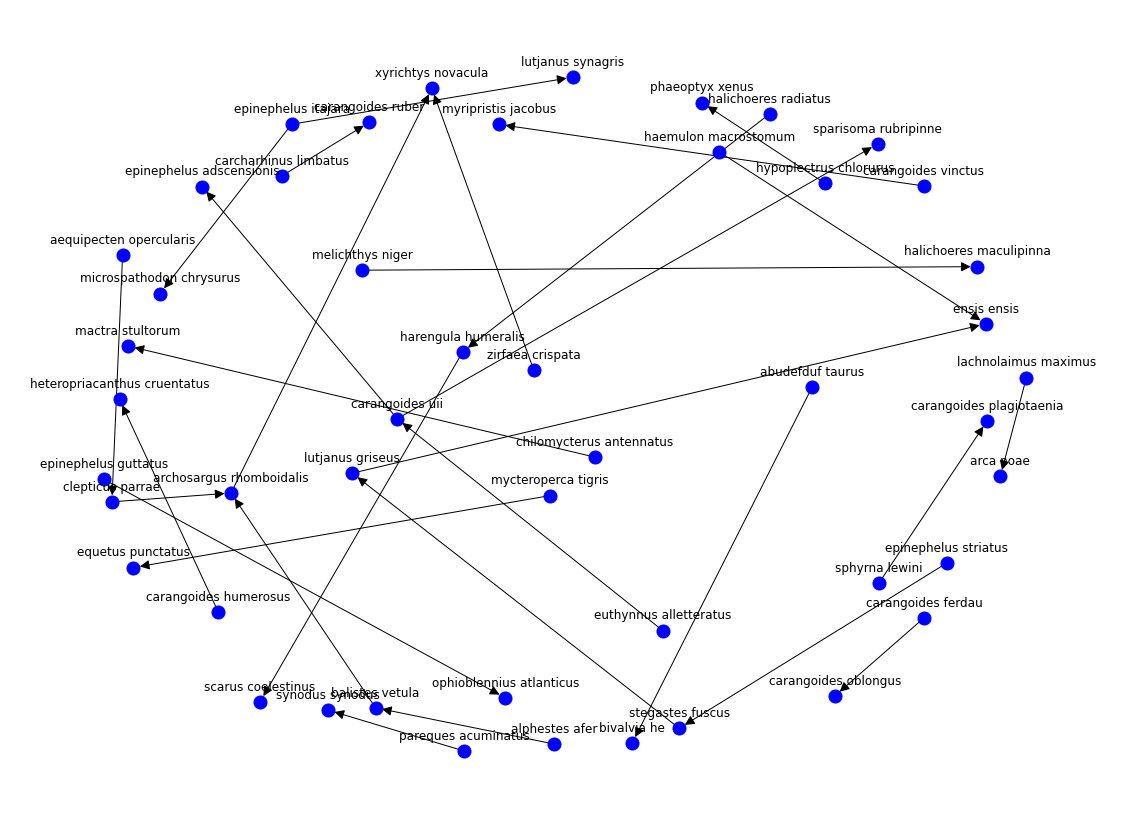

In [25]:
from Medeina import Web
import networkx as nx
with open(resultFamily+"/validation#reef_spnames",'rb') as f:
    rs = pickle.load(f)

G = nx.DiGraph()
results = rs[0][0]
for predator,prey in results:
    G.add_edge(predator,prey)
drawGraph(results)

In [24]:
def drawGraph(results):
    results = list(map(lambda x: x[0],results))[0:30]
    test = [1]*50
    if len(test) < 60 and len(test) > 20:
        G = nx.DiGraph()
        for pred,prey in results:
            G.add_edge(pred,prey)
        pos=nx.spring_layout(G,k=1)
        for label in pos:
            x,y = pos[label]
            plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=12)
        nx.draw(G,pos,node_size=170,arrowsize=20,arrowstyle='-|>',node_color='blue')
        return True
    return False

In [101]:
def drawConfusionMatrixForLevel(path):
    precs = []
    recs = []
    files = os.listdir(path)
    cnt = 0
    counter = 0
    for item in files:
        with open(path+"/"+item,'rb') as f:
            arr = pickle.load(f)
            result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]

            pass_in = (result,actual,allInteractions)
            precs.append(calcPrecision(pass_in))
            recs.append(calcRecall(pass_in))
            if precs[-1] < 0.05 and recs[-1] < 0.05:
                cnt +=1
            counter += 1
#             if counter % 10 == 0:
#                 print("Reached record "+ str(counter))
    fig, ax = plt.subplots()
    hist, xbins, ybins, im = plt.hist2d(recs, precs, bins=[10,10])
    
    print(hist.T[::-1])
    print(sum(hist.T[::-1]))
    print(sum(hist[::-1]))
    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.05,ybins[i]+0.05, hist.T[i,j], 
                    color="w", ha="center", va="center")
    ax.text(xbins[len(xbins)-2]+0.05,ybins[2]+0.05, hist.T[2,len(xbins)-2], color="black", ha="center", va="center")
    #fontweight="bold"

#     plt.show()
#     plt.hist2d(recs, precs, bins=[10,10])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Counts')

[[ 24.  18.  27.  27.  35. 102.  75.  71.  74. 170.]
 [  2.  22.  11.  20.  14.  27.  26.  21.  30.  22.]
 [  6.  20.  12.  14.  16.  13.  14.  28.  15.  31.]
 [ 10.   9.  19.  16.  18.  15.  27.  26.  32.  39.]
 [ 24.  23.  27.  18.  13.  19.  32.  40.  22.  30.]
 [ 10.  17.  14.  18.  10.  15.  28.  21.  19.  12.]
 [  8.  10.   9.   5.   9.  16.  17.  14.  16.   9.]
 [ 19.   4.  13.  20.  15.  16.   9.   5.   7.   2.]
 [ 11.   4.  17.   7.   5.   3.   0.   0.   0.   0.]
 [111.   1.   0.   1.   0.   0.   0.   0.   0.   0.]]
[225. 128. 149. 146. 135. 226. 228. 226. 215. 315.]
[113.  47. 110. 113. 164. 248. 211. 169. 195. 623.]


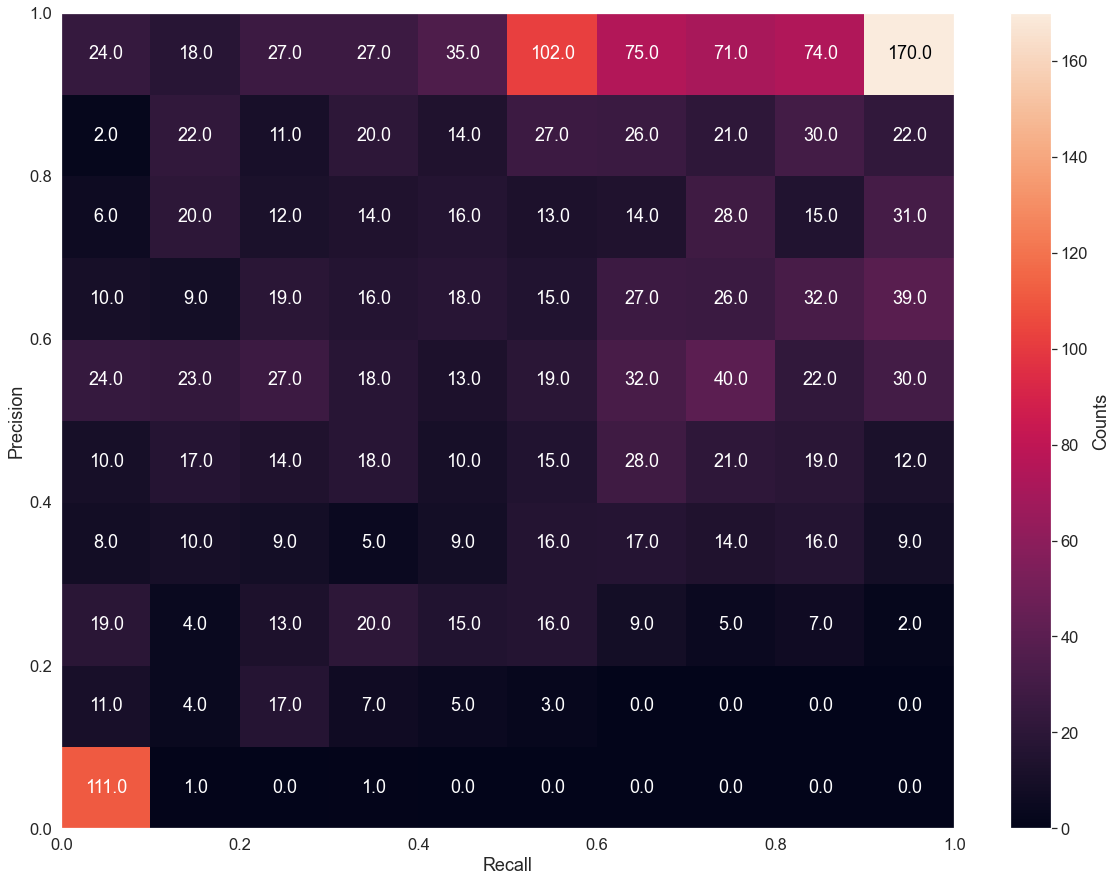

In [85]:
drawConfusionMatrixForLevel(resultExact)

[[ 24.  18.  27.  27.  35. 102.  75.  71.  74. 170.]
 [  2.  22.  11.  20.  14.  27.  26.  21.  30.  22.]
 [  6.  20.  12.  14.  16.  13.  14.  28.  15.  31.]
 [ 10.   9.  19.  16.  18.  15.  27.  26.  32.  39.]
 [ 24.  23.  27.  18.  13.  19.  32.  40.  22.  30.]
 [ 10.  17.  14.  18.  10.  15.  28.  21.  19.  12.]
 [  8.  10.   9.   5.   9.  16.  17.  14.  16.   9.]
 [ 19.   4.  13.  20.  15.  16.   9.   5.   7.   2.]
 [ 11.   4.  17.   7.   5.   3.   0.   0.   0.   0.]
 [111.   1.   0.   1.   0.   0.   0.   0.   0.   0.]]
[225. 128. 149. 146. 135. 226. 228. 226. 215. 315.]
[113.  47. 110. 113. 164. 248. 211. 169. 195. 623.]


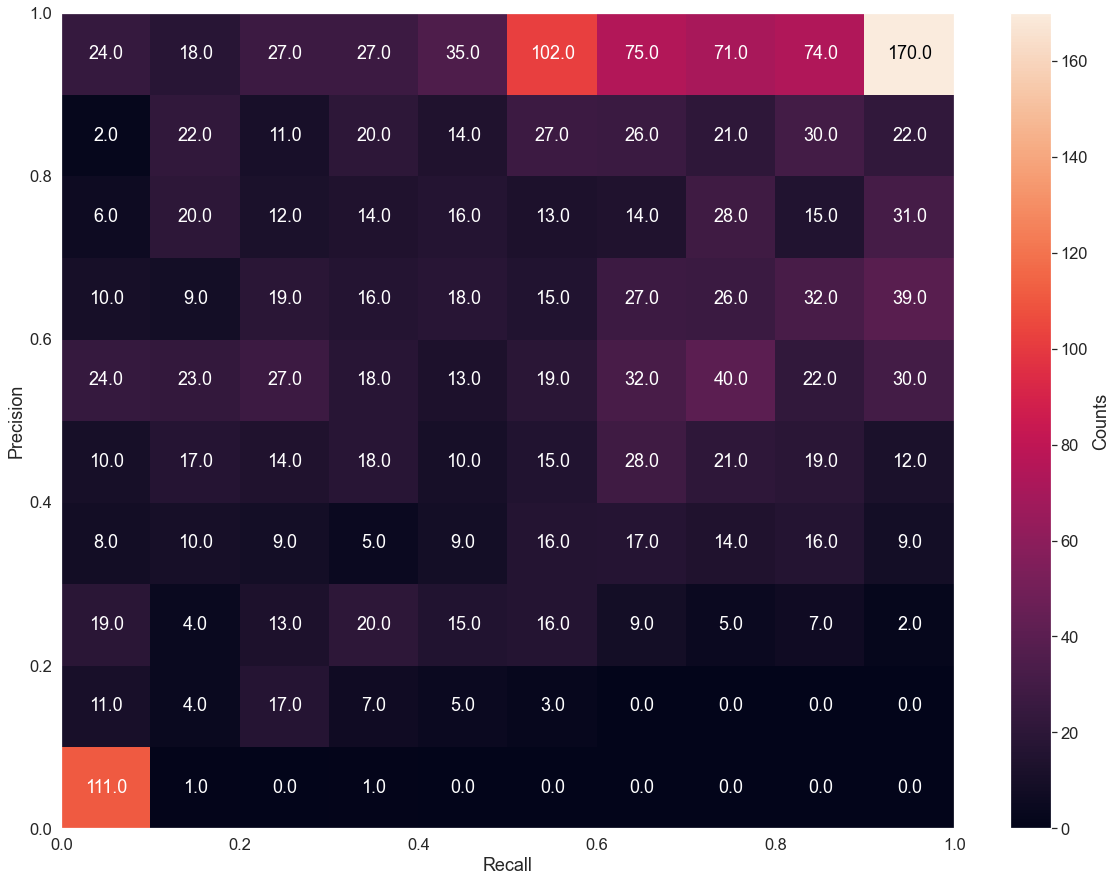

In [86]:
drawConfusionMatrixForLevel(resultExact)

[[ 13.   6.   9.  13.  14.  57.  60.  49.  60. 167.]
 [  0.  12.   5.  11.  11.  12.  16.  11.  14.   5.]
 [  0.  11.   2.  12.  12.  22.  11.  21.  16.  12.]
 [  5.  18.  19.   6.  15.  16.  12.  18.  16.  29.]
 [ 24.  24.  29.  21.  28.  18.  25.  40.  39.  62.]
 [ 16.  18.  23.  12.  15.  20.  41.  25.  27.  48.]
 [  9.   9.  22.  12.  16.  17.  18.  35.  42.  45.]
 [ 20.  17.   7.   7.  14.  15.  24.  25.  38.  35.]
 [ 10.   7.  15.  15.   8.   7.   8.   9.   5.   5.]
 [ 96.   3.   3.   1.   1.   0.   0.   0.   0.   0.]]
[193. 125. 134. 110. 134. 184. 215. 233. 257. 408.]
[104.  89. 202. 225. 245. 310. 154. 119.  97. 448.]


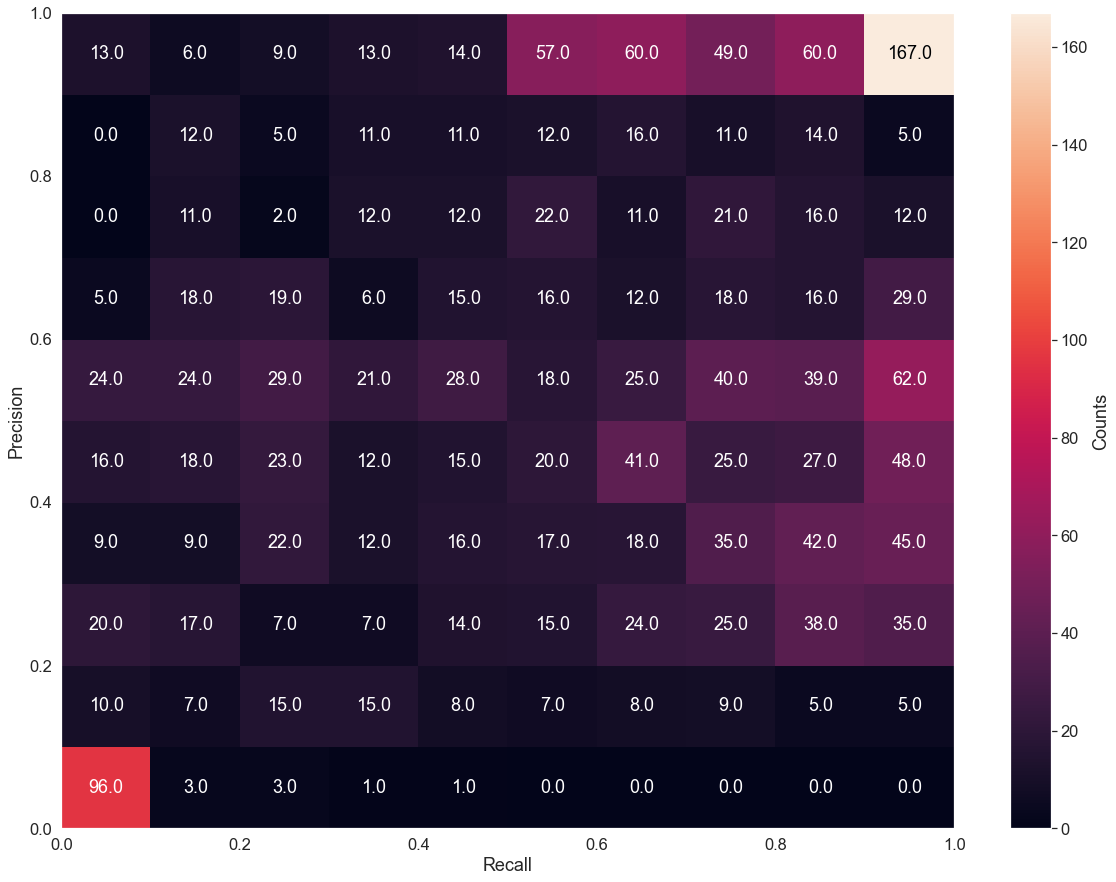

In [87]:
drawConfusionMatrixForLevel(resultGenus)

[[  2.   0.   0.   2.   0.  25.   4.   0.   0.  67.]
 [  0.   4.   1.   0.   2.   1.   0.   0.   0.   2.]
 [  0.   5.   3.   0.   4.   4.   9.   7.   2.   6.]
 [  2.   5.   4.   3.   6.   5.  49.  11.   7.  51.]
 [ 14.  11.   4.  12.   7.  21.  13.  48.  27.  78.]
 [  4.   5.   8.  11.  31.  27.  16.  19.  33.  79.]
 [ 11.  15.  10.   7.  28.  25.  22.  42.  68.  83.]
 [ 11.  14.  22.  21.  30.  27.  38.  48.  88. 158.]
 [ 20.  26.  27.  31.  31.  16.  17.  13.  33.  90.]
 [ 92.  12.  19.  15.   5.   5.   6.   2.   2.   2.]]
[156.  97.  98. 102. 144. 156. 174. 190. 260. 616.]
[160. 304. 457. 311. 233. 235. 143.  40.  10. 100.]


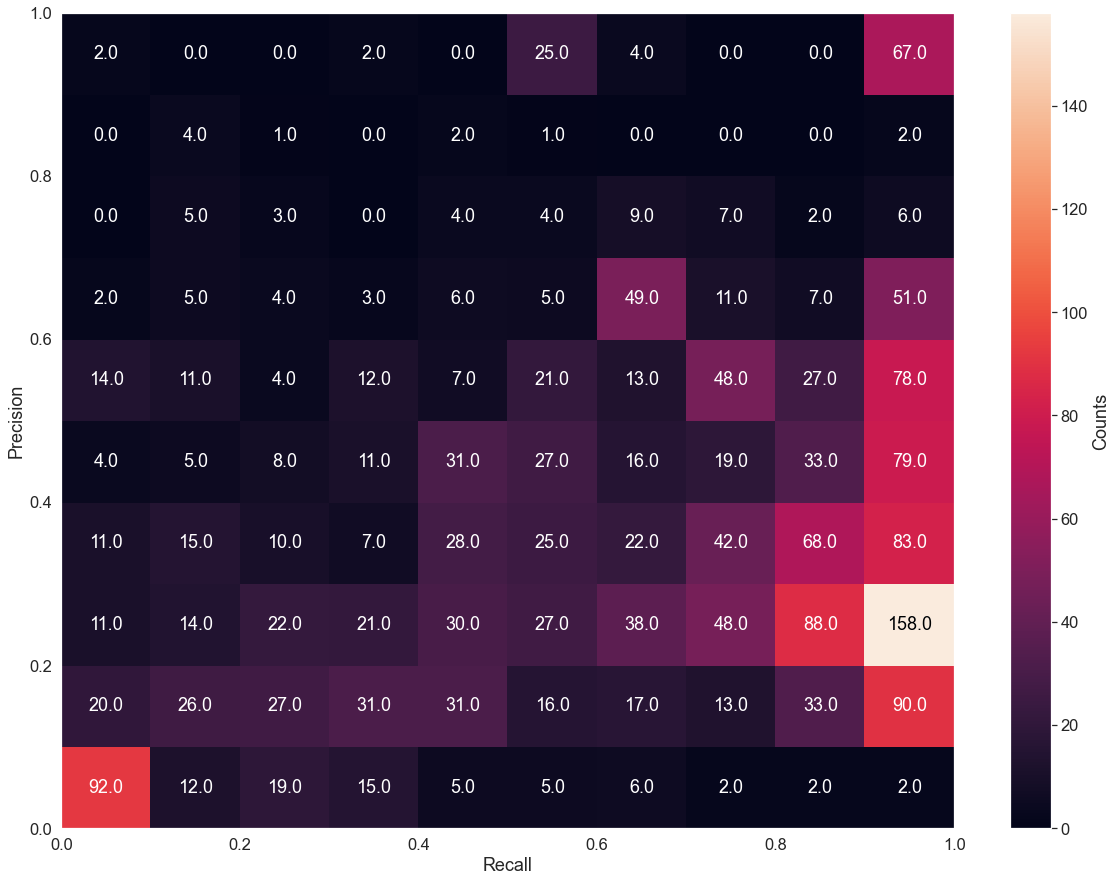

In [102]:
drawConfusionMatrixForLevel(resultFamily)

[[ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  0.  1.]
 [ 0.  0.  2.  2.  1.  2.  6.  2.  2. 11.]
 [ 0.  1.  1.  0.  2.  2.  2.  8.  3. 12.]
 [ 0.  1.  1.  1.  2.  1.  6.  0.  4.  9.]
 [ 0.  2.  0.  1.  2.  3.  4.  4.  9.  3.]
 [ 0.  2.  2.  1.  3.  0.  5.  2.  3. 12.]
 [ 4.  0.  0.  0.  3.  0.  0.  0.  0.  1.]]
[ 4.  7.  6.  6. 15.  9. 23. 17. 22. 49.]
[ 8. 30. 28. 25. 31. 28.  4.  2.  0.  2.]


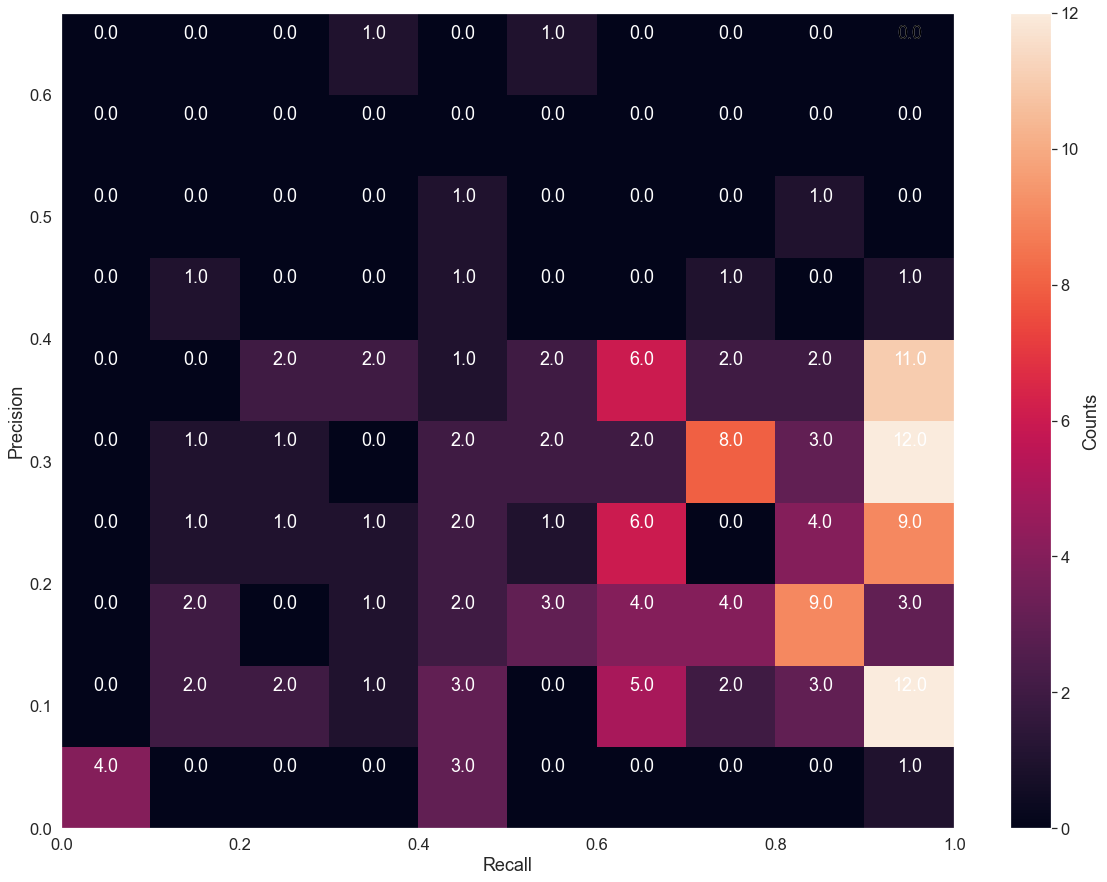

In [89]:
drawConfusionMatrixForLevel(resultOrder)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 2.]


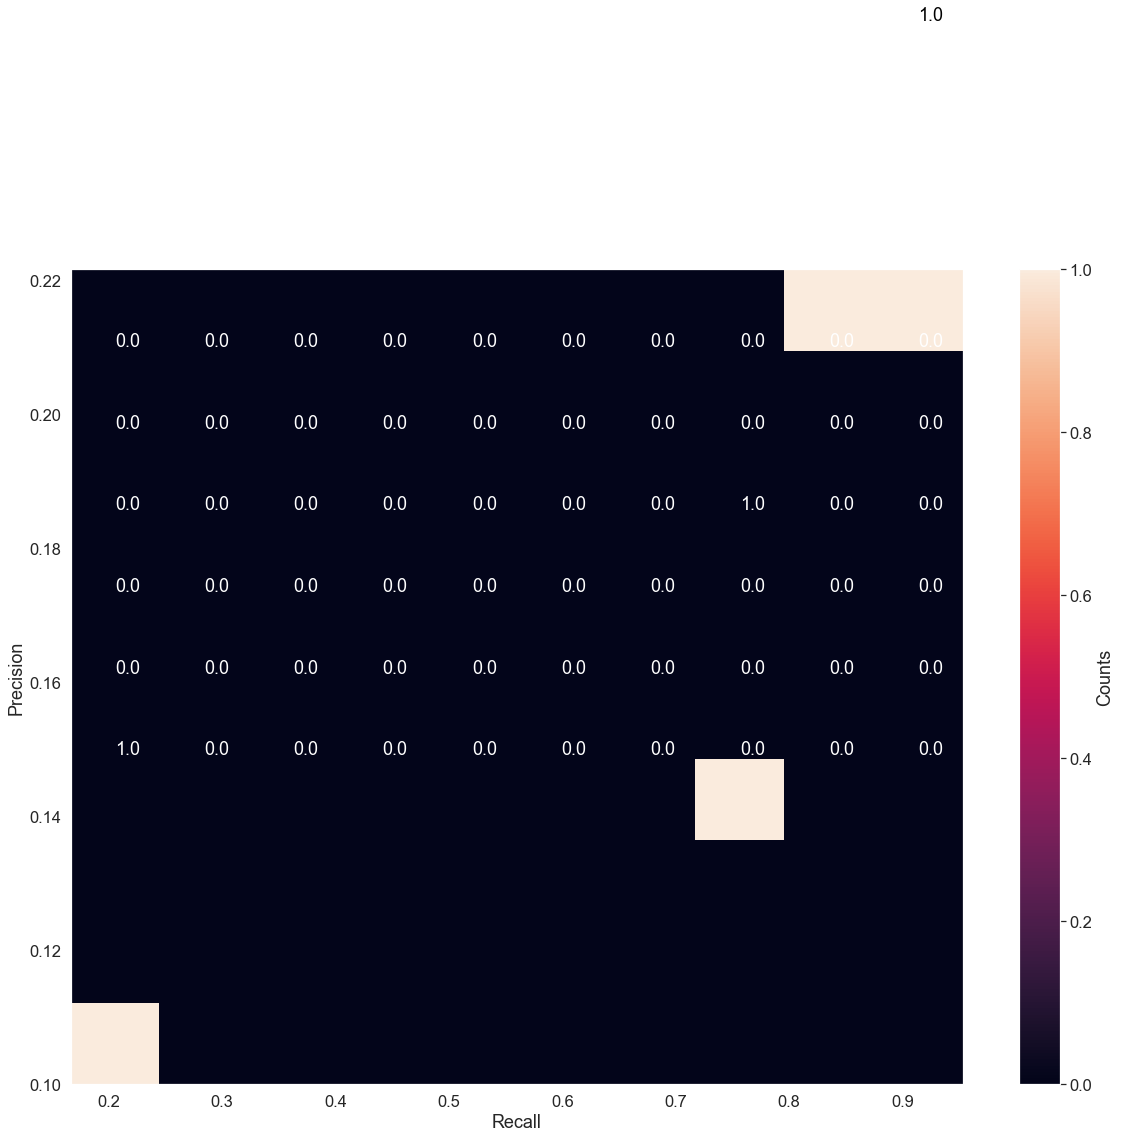

In [90]:
drawConfusionMatrixForLevel(resultClass)

In [ ]:
len(list(filter(lambda x: x[0]<0.5 and x[1]<0.5,list(zip(precs,recs)))))

In [ ]:
list(itertools.product([1,2,3],[5,6]))

In [22]:
def calcPrecision(results):
    try:
        generated,real,allInter = results
        allInter = getTrueAllInter(allInter)
        tp = getTruePossitives(generated,real,allInter)
        fp = getFalsePositives(generated,real,allInter)
        return tp/(tp+fp)
    except Exception as e:
        return 0.0
    
def calcRecall(results):
    try:
        generated,real,allInter = results
        allInter = getTrueAllInter(allInter)
        tp = getTruePossitives(generated,real,allInter)
        fn = getFalseNegatives(generated,real,allInter)
        return tp/(tp+fn)   
    except Exception as e:
        return 0.0

def getTrueAllInter(allInter):
    allNames = list(set(itertools.chain(*allInter)))
    allNames= list(set(itertools.product(allNames,allNames)))
    return allNames

def showConfusionMatrix(results):
    generated,real,allInter = results
    allInter = getTrueAllInter(allInter)
    tp = getTruePossitives(generated,real,allInter)
    fp = getFalsePositives(generated,real,allInter)
    fn = getFalseNegatives(generated,real,allInter)
    tn = getTrueNegatives(generated,real,allInter)
    array = [[tp,fp],[fn,tn]]
    df_cm = pd.DataFrame(array)
    import seaborn as sns # for data visualization
    import matplotlib.pyplot as plt # for data visualization
    sns.set(font_scale=1.5)
    plt.figure(figsize = (10,7))
    x_axis_labels = ['Present Link','Not Present Link'] # labels for x-axis
    y_axis_labels = ['Present Link','Not Present Link'] # labels for y-axis
    ax = sns.heatmap(df_cm,cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True,fmt='g',annot_kws={"fontsize":20}) # create seaborn heatmap    
    plt.xlabel('Real', fontsize = 25) # x-axis label with fontsize 15
    plt.ylabel('Generated', fontsize = 25) # y-axis label with fontsize 15
    plt.show()


def getTruePossitives(generated,real,allInter):
    real = set(sortTuples(real))
    generated = set(map(lambda x: sortSingleTuple(x[1]),generated))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item in generated and item in real:
            cnt += 1
    return cnt

def getFalsePositives(generated,real,allInter):
    real = set(sortTuples(real))
    generated = set(map(lambda x: sortSingleTuple(x[1]),generated))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item in generated and item not in real:
            cnt += 1
    return cnt

def getFalseNegatives(generated,real,allInter):
    real = set(sortTuples(real))
    generated = set(map(lambda x: sortSingleTuple(x[1]),generated))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item not in generated and item in real:
            cnt += 1
    return cnt

def getTrueNegatives(generated,real,allInter):
    real = set(sortTuples(real))
    generated = set(map(lambda x: sortSingleTuple(x[1]),generated))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item not in generated and item not in real:
            cnt += 1
    return cnt

def sortTuples(setOfTuples):
    return set(map(sortSingleTuple,setOfTuples))

def sortSingleTuple(tup):
    x,y = tup
    if x < y:
        return (x,y)
    elif y < x:
        return (y,x)
    else:
        return (x,y)

In [15]:
precs = []
recs = []
cnt = 0
ocnt = 0
for item in files[:]:
    with open(resultExact+"/"+item,'rb') as f:
        arr = pickle.load(f)
        result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
        pass_in = (result,actual,allInteractions)
#         showConfusionMatrix(pass_in)
        if(calcPrecision(pass_in)) <= 0.1 and (calcRecall(pass_in))  <= 0.1:
            cnt += 1
            if getFalsePositives(*pass_in) == 0:
                ocnt += 1
print(ocnt/cnt)

0.8125


In [95]:
precs = []
recs = []
item = 'validation#reef_spnames'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    
[x[1] for x in result]

[('Lutjanus cyanopterus', 'Sparisoma aurofrenatum'),
 ('Synodus intermedius', 'Carangoides latus'),
 ('Sphyrna tiburo', 'Bivalvia'),
 ('Aetobatus narinari', 'Stegastes planifrons'),
 ('Galeocerdo cuvier', 'Lactophrys trigonus'),
 ('Mycteroperca venenosa', 'Stegastes planifrons'),
 ('Gastropoda', 'Scaphopoda'),
 ('Ginglymostoma cirratum', 'Harengula clupeola'),
 ('Carcharhinus leucas', 'Euthynnus alletteratus'),
 ('Halichoeres maculipinna', 'Scaphopoda'),
 ('Cantherhines pullus', 'Bivalvia'),
 ('Seriola dumerili', 'Calamus pennatula'),
 ('Haemulon album', 'Scaphopoda'),
 ('Gastropoda', 'Bivalvia'),
 ('Carcharhinus falciformis', 'Aetobatus narinari'),
 ('Negaprion brevirostris', 'Anocha lyolepis'),
 ('Sphyrna tiburo', 'Gymnothorax moringa'),
 ('Tylosurus acus acus', 'Carangoides bartholomaei'),
 ('Bothus lunatus', 'Anocha lyolepis'),
 ('Carcharhinus falciformis', 'Sparisoma radians'),
 ('Gastropoda', 'Scaphopoda'),
 ('Trachinotus goodei', 'Bivalvia'),
 ('Ginglymostoma cirratum', 'Scaphop

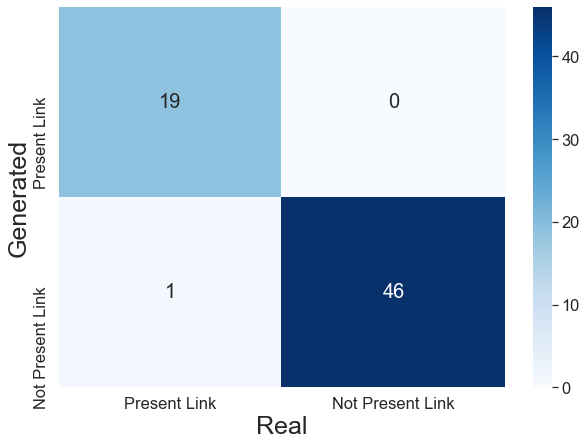

1.0 0.95
FoodsWebsCanberra#WEB45


In [94]:
precs = []
recs = []
item = 'FoodsWebsCanberra#WEB45'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

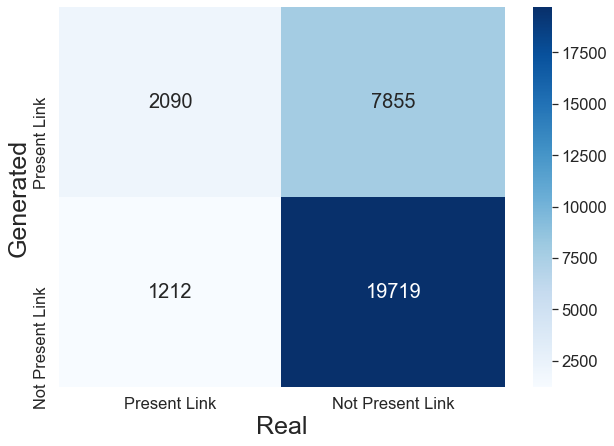

0.21015585721468075 0.6329497274379164
validation#reef_spnames


In [93]:
precs = []
recs = []
item = 'validation#reef_spnames'
with open(resultFamily+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

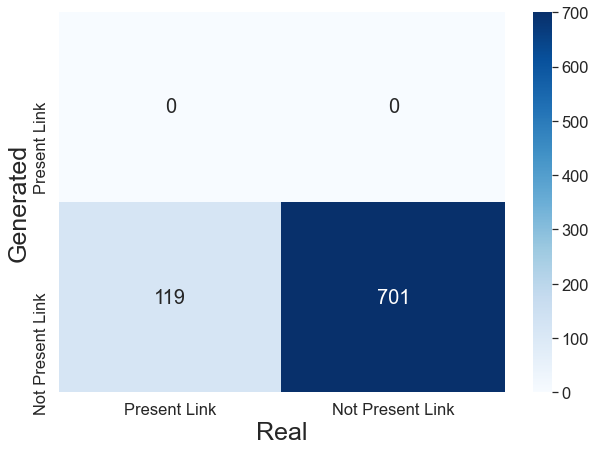

0.0 0.0
BaseCSV#plantSeed


In [18]:
precs = []
recs = []
item = 'BaseCSV#plantSeed'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

In [ ]:
!pip install matplotlib==3.1.0



In [ ]:
from Medeina import Web
w = Web("C:/Users/davie/Desktop/folds/FoodsWebsCanberra#WEB328")
len(w.stringNames)

In [ ]:
for item in w.stringNames:
    if 'paradisaea' in item: print(item,w.stringNames[item])

In [ ]:
w.linkMetas[3411]
len([w.linkMetas[l] for l in w.linkMetas if w.linkMetas[l]['dId']==10])

In [ ]:
from EcoNameTranslator import EcoNameTranslator
t = EcoNameTranslator().translate(['Blue bird of Paradise'])
t